In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#read origin img 
image = cv2.imread('lena.bmp',0)
rows,cols = image.shape
img = np.asarray(image)

In [3]:
n_img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT)

def mask(img, i, j, kernel):
    k_r, k_c = kernel.shape
    tmp = 0
    for a in range(k_r):
        for b in range(k_c):
            tmp += img[i+a][j+b] * kernel[a][b]
    return tmp

### Laplacian

In [4]:
La_1 = np.array([[0, 1, 0],
                 [1,-4, 1],
                 [0, 1, 0]])

La_2 = np.array([[1, 1, 1],
                 [1,-8, 1],
                 [1, 1, 1]])

La_2 = np.divide(La_2, 3)

In [5]:
def laplacian(img,kernel,threshold):
    lap_out = np.full((512,512),0)
    r,c = img.shape
    for i in range(512):
        for j in range(512):
            val = mask(img, i, j, kernel)        
            if val >= threshold:
                lap_out[i][j] = 1
            elif val <= threshold*(-1):
                lap_out[i][j] = -1
            else: 
                lap_out[i][j] = 0
    return lap_out

In [6]:
def check_neighbor(img,i,j):
    for a in range(3):
        for b in range(3):
            if img[i+a-1][j+b-1] == -1:
                return 1
            
    return -1
        
def zero_cross(img):
    cro_out = np.full((512,512),0)
    r,c = img.shape
    for i in range(1,r-1):
        for j in range(1,c-1):      
            if img[i][j] == -1 or img[i][j] == 0:
                cro_out[i-1][j-1] = 255
            elif check_neighbor(img,i,j) == 1: 
                cro_out[i-1][j-1] = 0
            else: 
                cro_out[i-1][j-1] = 255
    return cro_out

In [7]:
## can change kernel and threshold here
lap_out = laplacian(n_img, La_1, 15)
##
lap_out = cv2.copyMakeBorder(lap_out,1,1,1,1,cv2.BORDER_REFLECT)
cro_out = zero_cross(lap_out)
cv2.imwrite('Laplacian_15_1.png',cro_out)

lap_out = laplacian(n_img, La_2, 15)
##
lap_out = cv2.copyMakeBorder(lap_out,1,1,1,1,cv2.BORDER_REFLECT)
cro_out = zero_cross(lap_out)
cv2.imwrite('Laplacian_15_2.png',cro_out)

True

### minimum-variance Laplacian

In [8]:
La_min = np.array([[ 2, -1, 2],
                   [-1, -4,-1],
                   [ 2, -1, 2]])
La_min = np.divide(La_min, 3)
lap_out = laplacian(n_img, La_min, 20)
lap_out = cv2.copyMakeBorder(lap_out,1,1,1,1,cv2.BORDER_REFLECT)
cro_out = zero_cross(lap_out)
cv2.imwrite('min_var_Laplacian_20.png',cro_out)

True

### laplacian of Gaussian

In [9]:
gau_img = cv2.copyMakeBorder(img,5,5,5,5,cv2.BORDER_REFLECT)
La_gau = np.array([[ 0, 0,  0, -1, -1, -2, -1, -1,  0, 0, 0],
                   [ 0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
                   [ 0,-2, -7,-15,-22,-23,-22,-15, -7,-2, 0],
                   [-1,-4,-15,-24,-14, -1,-14,-24,-15,-4,-1],
                   [-1,-8,-22,-14, 52,103, 52,-14,-22,-8,-1],
                   [-2,-9,-23, -1,103,178,103, -1,-23,-9,-2],
                   [-1,-8,-22,-14, 52,103, 52,-14,-22,-8,-1],
                   [-1,-4,-15,-24,-14, -1,-14,-24,-15,-4,-1],
                   [ 0,-2, -7,-15,-22,-23,-22,-15, -7,-2, 0],
                   [ 0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
                   [ 0, 0,  0, -1, -1, -2, -1, -1,  0, 0, 0]])

lap_out = laplacian(gau_img, La_gau, 3000)
lap_out = cv2.copyMakeBorder(lap_out,1,1,1,1,cv2.BORDER_REFLECT)
cro_out = zero_cross(lap_out)
cv2.imwrite('Lap_of_gaussian_3000.png',cro_out)

True

### Difference of Gaussian

In [10]:
dif_img = cv2.copyMakeBorder(img,5,5,5,5,cv2.BORDER_REFLECT)

La_dif = np.array([[-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
                   [-3, -5, -8,-11,-13,-13,-13,-11, -8, -5, -3],
                   [-4, -8,-12,-16,-17,-17,-17,-16,-12, -8, -4],
                   [-6,-11,-16,-16,  0, 15,  0,-16,-16,-11, -6],
                   [-7,-13,-17,  0, 85,160, 85,  0,-17,-13, -7],
                   [-8,-13,-17, 15,160,283,160, 15,-17,-13, -8],
                   [-7,-13,-17,  0, 85,160, 85,  0,-17,-13, -7],
                   [-6,-11,-16,-16,  0, 15,  0,-16,-16,-11, -6],
                   [-4, -8,-12,-16,-17,-17,-17,-16,-12, -8, -4],
                   [-3, -5, -8,-11,-13,-13,-13,-11, -8, -5, -3],
                   [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1]])


#La_dif = DOG(1, 3, 11)

lap_out = laplacian(dif_img, La_dif, 1)
lap_out = cv2.copyMakeBorder(lap_out,1,1,1,1,cv2.BORDER_REFLECT)
cro_out = zero_cross(lap_out)
cv2.imwrite('diff_gaussian_1.png',cro_out)

True

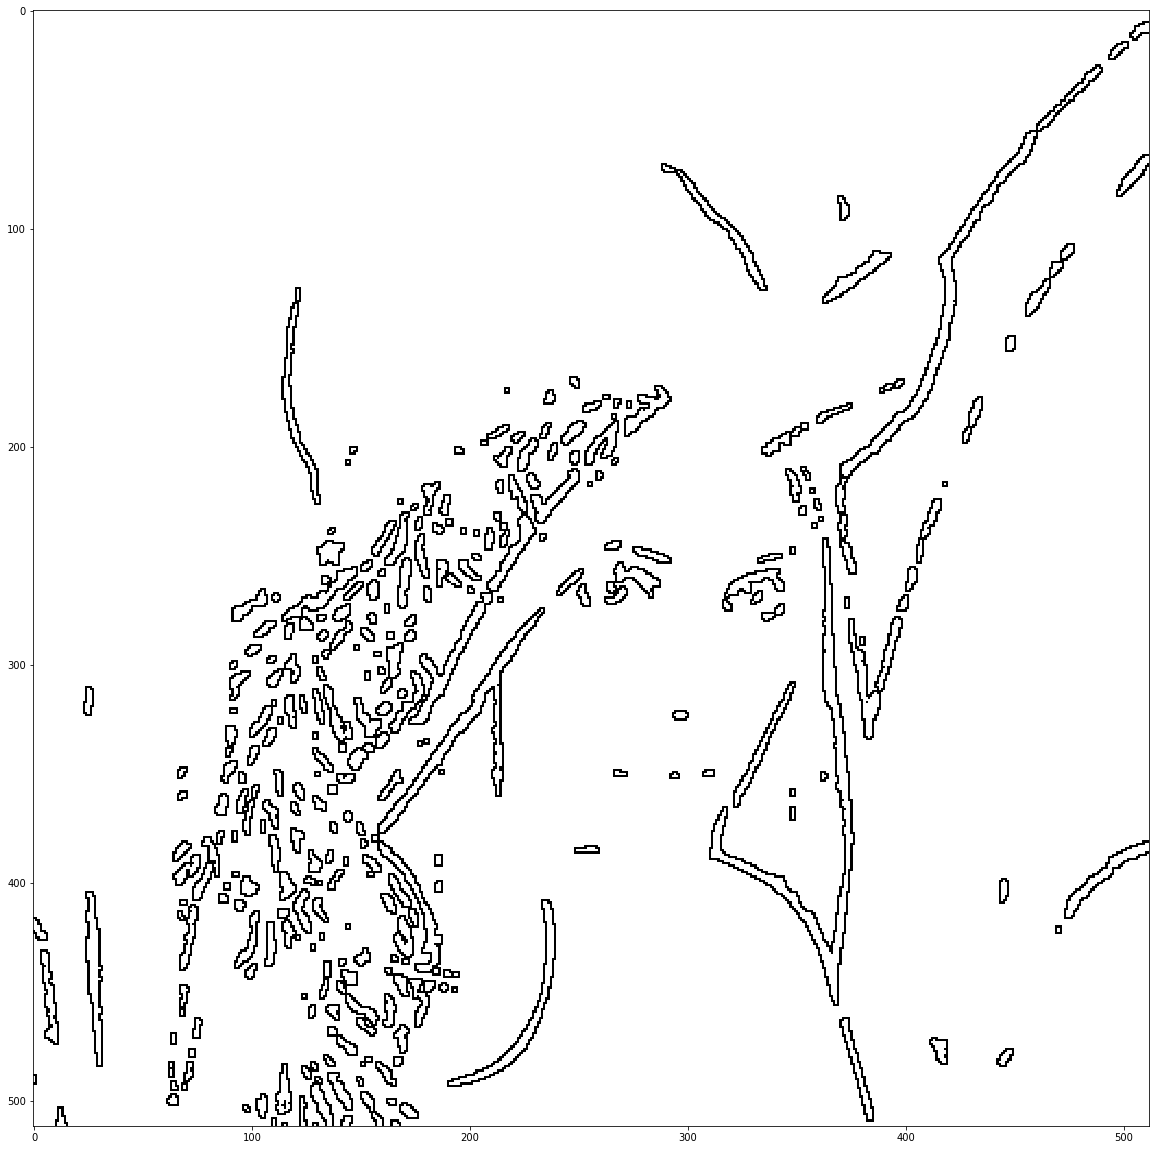

In [11]:
X = cro_out
fig, ax = plt.subplots(figsize=(20,40))
ax.imshow(X,cmap = 'gray')
numrows, numcols = X.shape
plt.show()

In [10]:
import numpy as np
def DOG(r, c, lo,k):    
    return 1/(2*np.pi*(lo**2))*(np.exp(-1*(r**2+c**2)/(2*(lo**2))))\
    -1/(2*np.pi*((k*lo)**2))*(np.exp(-1*(r**2+c**2)/(2*((lo*k)**2))))
test = np.zeros((11,11))
for i in range(-5,5):
    for j in range(-5,5):
        test[i+5][j+5] = DOG(i,j,3,11)

In [11]:
print(test)

[[0.00095669 0.00166938 0.00253062 0.00338665 0.00402681 0.00426504
  0.00402681 0.00338665 0.00253062 0.00166938 0.        ]
 [0.00166938 0.0028448  0.00426504 0.0056766  0.00673217 0.00712498
  0.00673217 0.0056766  0.00426504 0.0028448  0.        ]
 [0.00253062 0.00426504 0.00636059 0.00844328 0.01000071 0.01058027
  0.01000071 0.00844328 0.00636059 0.00426504 0.        ]
 [0.00338665 0.0056766  0.00844328 0.01119295 0.01324911 0.01401427
  0.01324911 0.01119295 0.00844328 0.0056766  0.        ]
 [0.00402681 0.00673217 0.01000071 0.01324911 0.01567822 0.01658216
  0.01567822 0.01324911 0.01000071 0.00673217 0.        ]
 [0.00426504 0.00712498 0.01058027 0.01401427 0.01658216 0.01753773
  0.01658216 0.01401427 0.01058027 0.00712498 0.        ]
 [0.00402681 0.00673217 0.01000071 0.01324911 0.01567822 0.01658216
  0.01567822 0.01324911 0.01000071 0.00673217 0.        ]
 [0.00338665 0.0056766  0.00844328 0.01119295 0.01324911 0.01401427
  0.01324911 0.01119295 0.00844328 0.0056766  0.  